In [55]:
from typing_extensions import TypedDict
from typing import Literal

In [56]:
class TypedDictState(TypedDict):
    name:str
    game:Literal["cricket","badminton"]

In [57]:
def play_game(state:TypedDictState):
    print("---play game node has been called---")
    return {"name":state["name"]+" want to play "}

def cricket(state:TypedDictState):
    print("---cricket game node has been called---")
    return {"game":"cricket"}

def badminton(state:TypedDictState):
    print("---badminton game node has been called---")
    return {"game":"badminton"}

In [58]:
import random
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

In [59]:
builder=StateGraph(TypedDictState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

In [60]:
import random
def decide_play(state:TypedDictState)->Literal["cricket","badminton"]:
    if random.random()<0.5:
        return "cricket"
    else:
        return "badminton"

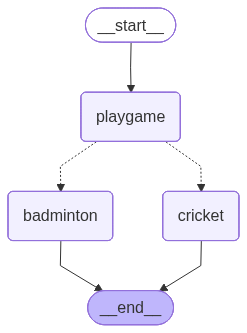

In [61]:
builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [62]:
graph.invoke({"name":"123"})

---play game node has been called---
---cricket game node has been called---


{'name': '123 want to play ', 'game': 'cricket'}

In [63]:
from pydantic import BaseModel

In [64]:
class State(BaseModel):
    name:str

In [65]:
def example_node(state:State):
    return {"name":"Hello"}

In [66]:
builder=StateGraph(State)
builder.add_node("example_node",example_node)
builder.add_edge(START,"example_node")
builder.add_edge("example_node",END)

graph=builder.compile()

In [67]:
graph.invoke({"name":"123"})

{'name': 'Hello'}

In [68]:
from langchain_core.messages import AIMessage,HumanMessage,AnyMessage

In [69]:
from langgraph.graph.message import add_messages

In [70]:
messages=[AIMessage(content=f"Please tell me how can i help",name="LLMModel")]
messages.append(HumanMessage(content=f"I want to learn coding.",name="123"))
messages.append(AIMessage(content=f"Which programming language you want to learn?",name="LLMModel"))

In [71]:
for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: LLMModel

Please tell me how can i help
================================ Human Message =================================
Name: 123

I want to learn coding.
================================== Ai Message ==================================
Name: LLMModel

Which programming language you want to learn?


In [72]:
from langchain_groq import ChatGroq

In [73]:
llm=ChatGroq(model="llama-3.1-8b-instant")

In [74]:
llm.invoke(messages)

AIMessage(content=" \n\nHere are a few popular options for beginners:\n\n1. **Python**: Easy to learn, versatile, and widely used in various fields like data science, machine learning, and web development.\n2. **JavaScript**: Used for client-side scripting in web development, creating interactive web pages, and developing desktop and mobile applications.\n3. **HTML/CSS**: Not a programming language, but essential for web development, HTML for structure and CSS for styling.\n4. **Java**: A popular language for Android app development, enterprise software development, and desktop applications.\n5. **C++**: A powerful language for building operating systems, games, and other high-performance applications.\n\nConsider the following factors to choose a language:\n\n- **Your goals**: What do you want to achieve with coding? (e.g., web development, game development, data analysis)\n- **Your interests**: Which areas of coding interest you the most?\n- **Your experience**: Do you have prior exp

In [75]:
from typing import Annotated

In [76]:
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [77]:
messages.clear()

In [78]:
messages=[AIMessage(content=f"Please tell me how can i help",name="LLMModel")]
messages.append(HumanMessage(content=f"I want to learn coding.",name="123"))
messages.append(AIMessage(content=f"Which programming language you want to learn?",name="LLMModel"))

In [79]:
def add(a:int,b:int)-> int:
    """ Add a and b
    Args:
        a (int): first int
        b (int): second int

    Returns:
        int
    """
    return a+b

In [80]:
### Binding tool with llm

llm_with_tools=llm.bind_tools([add])

tool_call=llm_with_tools.invoke([HumanMessage(content=f"What is 2 plus 2",name="Krish")])

In [81]:
initial_messages=[AIMessage(content=f"Please tell me how can I help",name="LLMModel")]
initial_messages.append(HumanMessage(content=f"I want to learn coding",name="Krish"))
initial_messages

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel', tool_calls=[], invalid_tool_calls=[]),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Krish')]

In [82]:
ai_message=AIMessage(content=f"Which programming language you want to learn",name="LLMModel")
ai_message

AIMessage(content='Which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel', tool_calls=[], invalid_tool_calls=[])

In [83]:
add_messages(initial_messages,ai_message)

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel', id='f527d1f4-320b-41d8-8ee0-41cdb34562e4', tool_calls=[], invalid_tool_calls=[]),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Krish', id='4c02da24-6c85-4b0c-84f4-8686d295f2f2'),
 AIMessage(content='Which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel', id='4358578d-6350-4d9f-9104-259e8a667066', tool_calls=[], invalid_tool_calls=[])]

In [84]:
def llm_tool(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

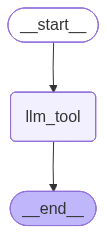

In [85]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
builder=StateGraph(State)

builder.add_node("llm_tool",llm_tool)

builder.add_edge(START,"llm_tool")
builder.add_edge("llm_tool",END)

graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [86]:
messages=graph.invoke({"messages":"What is 2 plus 2"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (zzge7vaa7)
 Call ID: zzge7vaa7
  Args:
    a: 2
    b: 2


In [87]:
from langgraph.prebuilt import ToolNode,tools_condition

In [88]:
tools=[add]

In [89]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


builder=StateGraph(State)

## Add nodes

builder.add_node("llm_tool",llm_tool)
builder.add_node("tools",ToolNode(tools))

## Add Edge
builder.add_edge(START,"llm_tool")
builder.add_conditional_edges(
    "llm_tool",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools",END)


graph_builder = builder.compile()



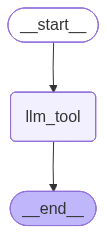

In [90]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [91]:
messages=graph.invoke({"messages":"What Machine Learning"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What Machine Learning
================================== Ai Message ==================================

I'm not sure what specific information you're looking for about Machine Learning. Can you please provide more details or context?


In [92]:
def add(a:int,b:int)-> int:
    """ Add a and b
    Args:
        a (int): first int
        b (int): second int

    Returns:
        int
    """
    return a+b

In [93]:

llm_with_tools=llm.bind_tools([add])

tool_call=llm_with_tools.invoke([HumanMessage(content=f"What is 2 plus 2",name="123")])

In [94]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class State(TypedDict):
    message:list[AnyMessage]

In [95]:
initial_messages=[AIMessage(content=f"Please tell me how can I help",name="LLMModel")]
initial_messages.append(HumanMessage(content=f"I want to learn coding",name="123"))
initial_messages

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel', tool_calls=[], invalid_tool_calls=[]),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='123')]

In [96]:
ai_message=AIMessage(content=f"Which programming language you want to learn",name="LLMModel")
ai_message

AIMessage(content='Which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel', tool_calls=[], invalid_tool_calls=[])

In [97]:
add_messages(initial_messages,ai_message)

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel', id='6df8e5ca-54cf-42e0-a5d0-43119cee2daa', tool_calls=[], invalid_tool_calls=[]),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='123', id='c059f838-03c1-4f4a-ac8a-7137b29fe4f6'),
 AIMessage(content='Which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel', id='f371b399-94bf-41c3-9769-0eb3a3c221ce', tool_calls=[], invalid_tool_calls=[])]

In [98]:
def llm_tool(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

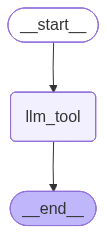

In [99]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
builder=StateGraph(State)

builder.add_node("llm_tool",llm_tool)

builder.add_edge(START,"llm_tool")
builder.add_edge("llm_tool",END)

graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [100]:
tools=[add]

In [101]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


builder=StateGraph(State)

## Add nodes

builder.add_node("llm_tool",llm_tool)
builder.add_node("tools",ToolNode(tools))

## Add Edge
builder.add_edge(START,"llm_tool")
builder.add_conditional_edges(
    "llm_tool",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools",END)


graph_builder = builder.compile()



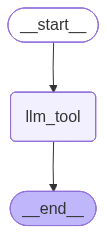

In [102]:
display(Image(graph.get_graph().draw_mermaid_png()))